**TEAM : -**
**CS23MTECH11024 - ARIF KHAN PATHAN,**
**CS23MTECH11033 - SANKET RATHOD ,**
**CS23MTECH11034 - SANKET DEONE ,**
**CS23MTECH11022 - AKSHAY KUMAR ,**
**CS23MTECH11021 - ABHISHREE GAJANAN KHANGAR ,**

In [41]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn related libraries
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Keras NN related libraries
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model, Sequential 
from keras import regularizers

In [42]:
file = 'C:\\Users\\Arif\\Desktop\\Fruad Assg\\creditcard.csv'

# print(os.path.exists(file))

# Load the data
df = pd.read_csv(file, header=0)

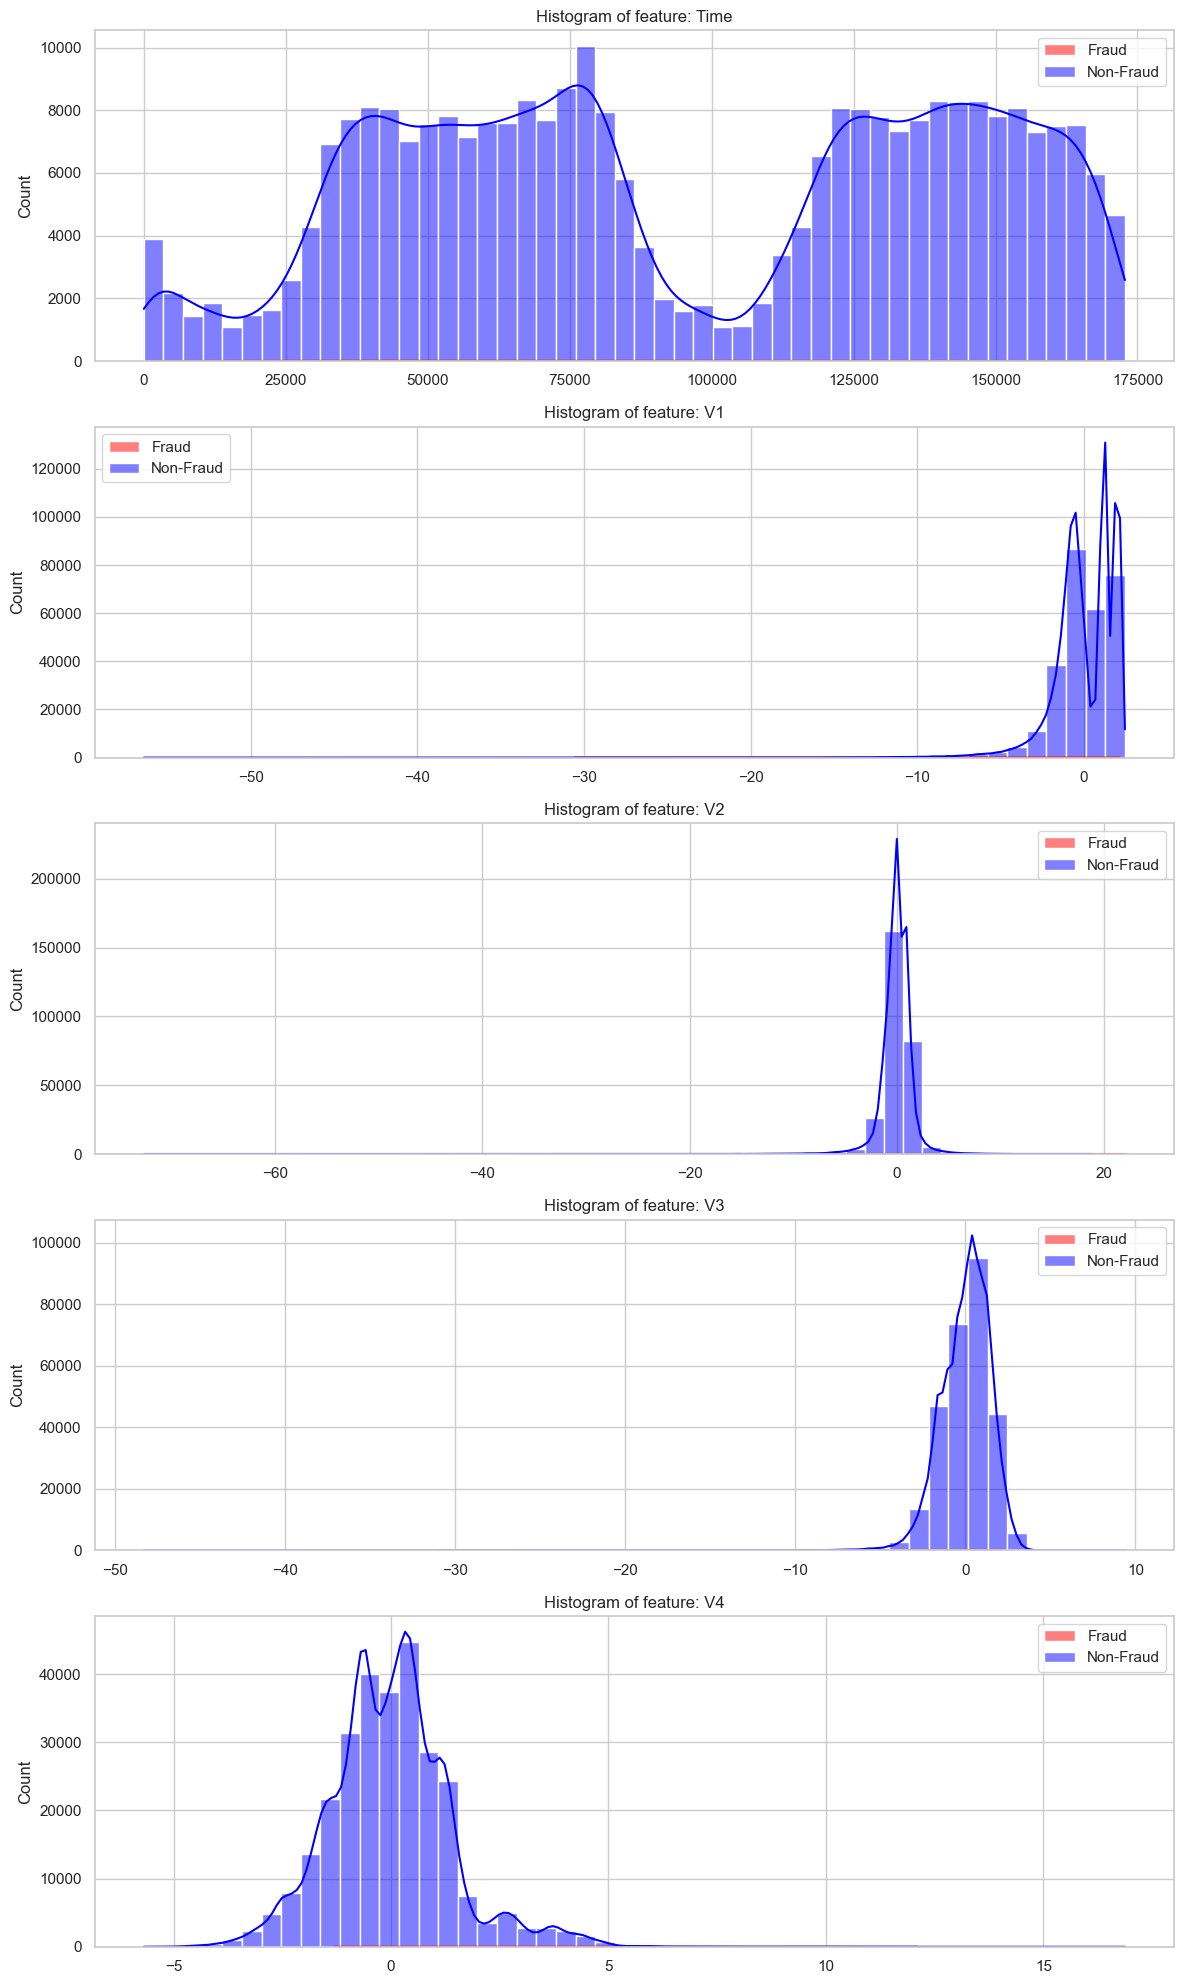

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline

plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)

for i, cn in enumerate(df.columns[:5]):
    ax = plt.subplot(gs[i])
    sns.histplot(df[cn][df.Class == 1], bins=50, ax=ax, kde=True, label='Fraud', color='red')
    sns.histplot(df[cn][df.Class == 0], bins=50, ax=ax, kde=True, label='Non-Fraud', color='blue')
    ax.set_xlabel('')
    ax.set_title('Histogram of feature: ' + str(cn))
    ax.legend()

plt.tight_layout()
plt.show()


In [44]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [45]:
# Convert 'Time' and 'Amount' features to log scale
df['Time'] = np.log1p(df['Time'])
df['Amount'] = np.log1p(df['Amount'])


In [46]:
# Sampling of data
normal = df[df['Class'] == 0].sample(4000)
fraud = df[df['Class'] == 1]

In [47]:
datasetSubset = pd.concat([normal, fraud], ignore_index=True)

In [48]:
# Splitting the dataset into X and y features
y = datasetSubset['Class']
X = datasetSubset.drop('Class', axis=1)

plot fraud and non fraud dataset

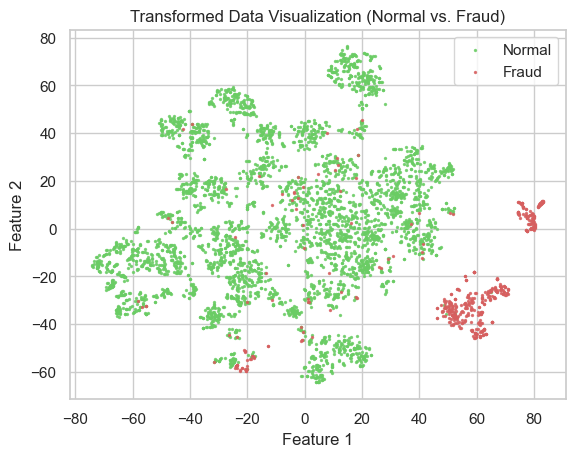

In [64]:
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns
from sklearn.manifold import TSNE


# Initializing TSNE object with 2 principal components
tsne = TSNE(n_components=2, random_state=0)
X_transformed = tsne.fit_transform(X)

# Filter data based on class labels
normal_indices = np.where(y == 0)[0]
fraud_indices = np.where(y == 1)[0]

# Create the scatter plot
#plt.figure(figsize=(12, 8))

plt.scatter(X_transformed[normal_indices, 0], X_transformed[normal_indices, 1],  
            marker='o', color='g', linewidth=1, alpha=0.8, label='Normal',s=2)
plt.scatter(X_transformed[fraud_indices, 0], X_transformed[fraud_indices, 1],   
            marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud',s=2)

plt.legend(loc='best')
plt.title('Transformed Data Visualization (Normal vs. Fraud)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [50]:
scaler = StandardScaler().fit_transform(X)

X_normal = scaler[y == 0]
X_fraud = scaler[y == 1]

*Autoncoder model defining*

In [51]:
# Input layer with a shape of features/columns of the dataset
input_layer = Input(shape = (X.shape[1], ))

# Construct encoder network
encoded = Dense(96, activation= 'relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(48, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(24, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation = 'relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation='sigmoid')(encoded)

# Decoder network
decoded = Dense(12, activation='relu')(encoded)
decoded = Dense(24, activation='relu')(decoded)
decoded = Dense(48, activation='relu')(decoded)
decoded = Dense(96, activation='relu')(decoded)

output_layer = Dense(X.shape[1], activation='sigmoid')(decoded)

# Building a model
autoencoder = Model(input_layer, output_layer)

In [52]:
# Compile the model with Mean Squared Error (MSE) as the loss function
autoencoder.compile(optimizer='adam', loss='mse')

# Print the summary of the autoencoder model
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 96)             │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 48)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 96)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 30)             │         2,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,396 (71.86 KB)

 Trainable params: 18,396 (71.86 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the best model weights
)

# Train the autoencoder model with early stopping
history = autoencoder.fit(
    X_normal, X_normal,  # Input and target are the same for autoencoder
    epochs=50,
    batch_size=64,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping]  # Include early stopping callback
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.8404 - val_loss: 0.5860
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6105 - val_loss: 0.5390
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6194 - val_loss: 0.5227
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6149 - val_loss: 0.5163
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5850 - val_loss: 0.5139
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6372 - val_loss: 0.5123
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6262 - val_loss: 0.5117
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5261 - val_loss: 0.5116
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5093 - val_loss: 0.5115
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5297 - val_loss: 0.5111
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5549 - val_loss: 0.5112
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5721 - val_l

In [54]:
latent_model = Sequential()
latent_model.add(autoencoder.layers[0])
latent_model.add(autoencoder.layers[1])
latent_model.add(autoencoder.layers[2])
latent_model.add(autoencoder.layers[3])
latent_model.add(autoencoder.layers[4])

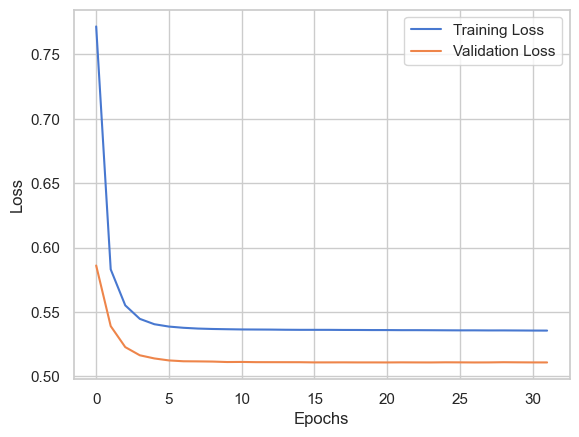

In [55]:
# Plot training history (optional)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
normal_tran_points = latent_model.predict(X_normal)
fraud_tran_points = latent_model.predict(X_fraud)
# Making as a one collection



125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [57]:
encoded_X = np.append(normal_tran_points, fraud_tran_points, axis=0)
y_normal = np.zeros(normal_tran_points.shape[0])
y_fraud = np.ones(fraud_tran_points.shape[0])
encoded_y = np.append(y_normal, y_fraud, axis=0)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(encoded_X, encoded_y, test_size=0.4)

In [59]:
# Use the trained autoencoder to reconstruct the test data
reconstructed_data = autoencoder.predict(X_test)

# Calculate the reconstruction error (MSE) between original and reconstructed data
mse = np.mean(np.square(X_test - reconstructed_data), axis=1)

# Set a threshold for anomaly detection (you can experiment with different thresholds)
threshold =9

# Classify transactions as normal (0) or fraudulent (1) based on the threshold
predictions = (mse > threshold).astype(int)

# Print the number of normal and fraudulent transactions
print("Number of normal transactions:", np.sum(predictions == 0))
print("Number of fraudulent transactions:", np.sum(predictions == 1))

# Evaluate the performance using F1 score
from sklearn.metrics import f1_score, precision_score, recall_score

f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Number of normal transactions: 1614
Number of fraudulent transactions: 183
F1 Score: 0.7979002624671915
Precision: 0.8306010928961749
Recall: 0.7676767676767676
